In [1]:
# Импорт библиотек

import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

In [2]:
#%%time
# Прочитаем исходные данные:
dtypes = {
    "row_id": "int64",
    "timestamp": "int64",
    "user_id": "int32",
    "content_id": "int16",
    "content_type_id": "int8",
    "task_container_id": "int16",
    "user_answer": "int8",
    "answered_correctly": "int8",
    "prior_question_elapsed_time": "float32", 
    "prior_question_had_explanation": "boolean"
}

#data_st = pd.read_csv("data/train.csv", dtype=dtypes)
data_st = pd.read_csv("data/train.csv", dtype=dtypes, nrows=2000000) # загрузка части данных для тестовой работы


In [3]:
data_st.shape     # -------------Размерность таблицы

(2000000, 10)

In [4]:
data_st.info()
#  row_id (int64) - ID строки
#	timestamp (int64) - время в мс между взаимодействием пользователя и первым завершением события от этого пользователя
#	user_id (int32)- ID пользователя
#	content_id (int16) - ID взаимодействия пользователя
#	content_type_id (int8) 0, - если событие является вопросом, заданным пользователю, 1, если событием было посещение пользователем лекции
#	task_container_id (int16) - ID группы вопросов или лекций. 	
#   user_answer (int8) - ответ пользователя на вопрос, если таковой имеется. -1 как null для лекций
#	answered_correctly (int8) - если пользователь ответил правильно. Читать -1 как null для лекций
#	prior_question_elapsed_time (float32) - Среднее время ответа на каждый вопрос в предыдущем пакете вопросов, без учета всех лекций между ними (mc). 
                                            # Является нулевым для первого пакета вопросов или лекции пользователя.
#	prior_question_had_explanation (bool) - Видел ли пользователь объяснение и правильный ответ(ы) после ответа на предыдущий пакет вопросов, без учета всех лекций между ними (mc).
                                            # является нулевым для первого пакета вопросов или лекции пользователя. 
                                            # Как правило, первые несколько вопросов - часть диагностического теста при входе в систему, без обратной связи.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  boolean
dtypes: boolean(1), float32(1), int16(2), int32(1), int64(2), int8(3)
memory usage: 62.9 MB


In [5]:
data_st.describe()       # -------------Получение описательной статистики

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,1.953324e+06
mean,9.999995e+05,7.706443e+09,2.090276e+07,5.228629e+03,1.949150e-02,8.744089e+02,1.376633e+00,6.222375e-01,2.548714e+04
std,5.773504e+05,1.131650e+10,1.234160e+07,3.868333e+03,1.382447e-01,1.240917e+03,1.193361e+00,5.234894e-01,2.001107e+04
min,0.000000e+00,0.000000e+00,1.150000e+02,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,4.999998e+05,5.129909e+08,9.678259e+06,2.063000e+03,0.000000e+00,1.060000e+02,0.000000e+00,0.000000e+00,1.600000e+04
50%,9.999995e+05,2.666179e+09,2.094902e+07,5.054000e+03,0.000000e+00,3.830000e+02,1.000000e+00,1.000000e+00,2.100000e+04
75%,1.499999e+06,1.019921e+10,3.156632e+07,7.434000e+03,0.000000e+00,1.141000e+03,3.000000e+00,1.000000e+00,2.966700e+04
max,1.999999e+06,7.819969e+10,4.220737e+07,3.273600e+04,1.000000e+00,9.999000e+03,3.000000e+00,1.000000e+00,3.000000e+05


In [6]:
display(data_st.head())             # -------------Получение первых и последних строк
display(data_st.tail())

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,<NA>
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
1999995,1999995,2805243340,42207371,1072,0,130,3,1,11000.0,True
1999996,1999996,2805281563,42207371,649,0,131,1,0,15000.0,True
1999997,1999997,2805317783,42207371,1300,0,132,3,0,17000.0,True
1999998,1999998,2805356293,42207371,12026,0,133,0,1,13000.0,True
1999999,1999999,2805396334,42207371,994,0,134,0,1,15000.0,True


In [7]:
# Проверим на пустые значения
data_st.isnull().any()

row_id                            False
timestamp                         False
user_id                           False
content_id                        False
content_type_id                   False
task_container_id                 False
user_answer                       False
answered_correctly                False
prior_question_elapsed_time        True
prior_question_had_explanation     True
dtype: bool

In [8]:
data_st.isnull().sum().to_frame().T

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,0,0,0,0,0,0,46676,7693


In [9]:
# Заполним пустые значения.
# для prior_question_elapsed_time - берем медиану значений, для prior_question_had_explanation  - считаем что объяснения и ответа не видел (False)
data_st['prior_question_elapsed_time'] = data_st['prior_question_elapsed_time'].fillna(data_st['prior_question_elapsed_time'].median())
data_st['prior_question_had_explanation'] = data_st['prior_question_had_explanation'].fillna(False).astype(bool)

In [10]:
# проверяем
data_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 10 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   row_id                          int64  
 1   timestamp                       int64  
 2   user_id                         int32  
 3   content_id                      int16  
 4   content_type_id                 int8   
 5   task_container_id               int16  
 6   user_answer                     int8   
 7   answered_correctly              int8   
 8   prior_question_elapsed_time     float32
 9   prior_question_had_explanation  bool   
dtypes: bool(1), float32(1), int16(2), int32(1), int64(2), int8(3)
memory usage: 61.0 MB


In [11]:
data_st.isnull().sum().to_frame().T

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,0,0,0,0,0,0,0,0


In [12]:
# questions.csv: данные для вопросов, заданных пользователям.
#	question_id: внешний ключ для столбца content_id тренинга/теста, когда тип контента - вопрос (0).
#	bundle_id: код, по которому вопросы подаются вместе.
#	correct_answer: ответ на вопрос. Можно сравнить со столбцом user_answer из тренинга, чтобы проверить, правильно ли ответил пользователь.
#	part: соответствующий раздел теста TOEIC.
#	tags: один или несколько подробных кодов тегов для вопроса. Значение тегов не указывается, но этих кодов достаточно для объединения вопросов в кластеры.

questions_data = pd.read_csv('data/questions.csv', sep=',')
questions_data.info()
display(questions_data.head(5))
questions_data.describe()  
questions_data.isnull().sum().to_frame().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int64 
 1   bundle_id       13523 non-null  int64 
 2   correct_answer  13523 non-null  int64 
 3   part            13523 non-null  int64 
 4   tags            13522 non-null  object
dtypes: int64(4), object(1)
memory usage: 528.4+ KB


,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,0,1


In [13]:
# lectures.csv: данные о лекциях, просмотренных пользователями в процессе обучения.
#	lecture_id: внешний ключ для столбца train/test content_id, когда тип контента - лекция (1).
#	part: код категории верхнего уровня для лекции.
#	tag: один код тега для лекции. Смысл тегов не указывается, но этих кодов достаточно для объединения лекций в кластеры.
#	type_of: краткое описание основной цели лекции.

lectures_data = pd.read_csv('data/lectures.csv', sep=',')
lectures_data.info()
display(lectures_data.head(5))
lectures_data.describe()  
lectures_data.isnull().sum().to_frame().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int64 
 1   tag         418 non-null    int64 
 2   part        418 non-null    int64 
 3   type_of     418 non-null    object
dtypes: int64(3), object(1)
memory usage: 13.2+ KB


,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


,lecture_id,tag,part,type_of
0,0,0,0,0


## Анализ данных

### Успеваемость студентов

In [16]:
# варианты ответов 1 - правильно, 0 - неправильно, (-1) - тип события лекция, ответ считаем = null 
data_st['answered_correctly'].unique()

array([ 1,  0, -1], dtype=int8)

In [17]:
# количество верных и неверных ответов
data_st['answered_correctly'].value_counts()

answered_correctly
 1    1283458
 0     677559
-1      38983
Name: count, dtype: int64

In [18]:
mask = data_st['answered_correctly'] != -1
#display(mask)
user_note = data_st[mask].groupby('user_id')['answered_correctly'].mean().reset_index()
#user_note.describe() 
# исключим оценки (-1)

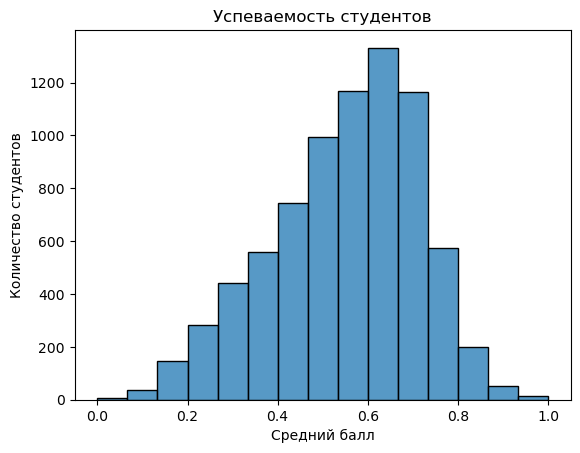

In [19]:
# Визуализация 
sns.histplot(user_note['answered_correctly'], bins=15)
plt.title('Успеваемость студентов')
plt.xlabel('Средний балл')
plt.ylabel('Количество студентов')
plt.show()

### Влияние "работы над ошибками" на успешность ответов 

In [21]:
# Влияние "работы над ошибками" на успешность ответов 

correct_antwort = data_st[(data_st['answered_correctly'] == 1)].shape[0]
print('Общее число правильных ответов:', correct_antwort)
                # Общее число правильных ответов, если студент видел объяснения и правильные ответы предыдущих вопросов
correct_antwort_mit_works = round(data_st[(data_st['prior_question_had_explanation'] == True) & (data_st['answered_correctly'] == 1)].shape[0]/ correct_antwort * 100,2)

                # Общее число правильных ответов, если студент не видел объяснения и правильные ответы предыдущих вопросов
correct_antwort_one_works = round(data_st[(data_st['prior_question_had_explanation'] == False) & (data_st['answered_correctly'] == 1)].shape[0] / correct_antwort * 100,2)

data_check = {"Правильные ответы с работой над ошибками": [correct_antwort_mit_works],
              "Правильные ответы без обратной связи": [correct_antwort_one_works]
}
data_error_check = pd.DataFrame(data_check)
display(data_error_check)

Общее число правильных ответов: 1283458


,Правильные ответы с работой над ошибками,Правильные ответы без обратной связи
0,92.42,7.58


In [22]:
# Положительное влияние на успеваемость работы над ошибками вполне ожидаемо, т.к. учебный материал представляет собой взаимосвязанную систему и 

### Bремя ответа на вопрос

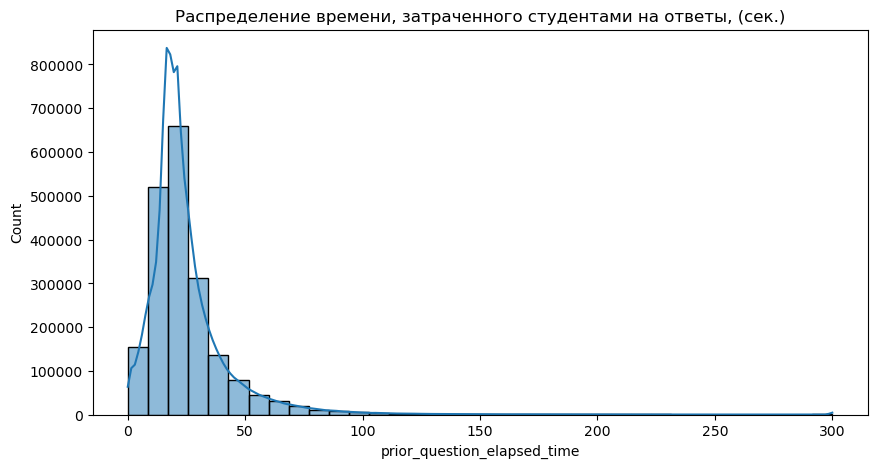

In [24]:
# 1. Распределение времени ответа на вопросы
plt.figure(figsize=(10, 5))
plt.title("Распределение времени, затраченного студентами на ответы, (сек.)")
sns.histplot(data_st['prior_question_elapsed_time']/1000, bins=35, kde=True)
plt.show()

### Взаимосвязь успеваемости и посещения студентами лекций

In [26]:
# агреггирование по посещаемости лекций и успеваемости
data_st['answered_correctly'] = data_st['answered_correctly'].replace(to_replace=-1, value=np.nan, regex=True) #
agg_func_math = {
    'content_type_id': ['mean', 'median', 'min', 'max', 'sum'],
    'answered_correctly': ['mean', 'median', 'min', 'max']
}
data_st_agg = data_st.groupby(['user_id']).agg(agg_func_math).round(2)
display(data_st_agg)

content_type_id                    answered_correctly              \
                    mean median min max sum               mean median  min   
user_id                                                                      
115                 0.00    0.0   0   0   0               0.70    1.0  0.0   
124                 0.00    0.0   0   0   0               0.23    0.0  0.0   
2746                0.05    0.0   0   1   1               0.58    1.0  0.0   
5382                0.02    0.0   0   1   3               0.67    1.0  0.0   
8623                0.03    0.0   0   1   3               0.64    1.0  0.0   
...                  ...    ...  ..  ..  ..                ...    ...  ...   
42189769            0.00    0.0   0   0   0               0.62    1.0  0.0   
42198669            0.00    0.0   0   1   1               0.57    1.0  0.0   
42200769            0.06    0.0   0   1   2               0.64    1.0  0.0   
42206662            0.00    0.0   0   0   0               0.59    1.0  0.0   
42207371            0.00    0.0   0   0   0               0.65    1.0  0.0   

               
          max  
user_id        
115       1.0  
124       1.0  
2746      1.0  
5382      1.0  
8623      1.0  
...       ...  
42189769  1.0  
42198669  1.0  
42200769  1.0  
42206662  1.0  
42207371  1.0  

[7712 rows x 9 columns]

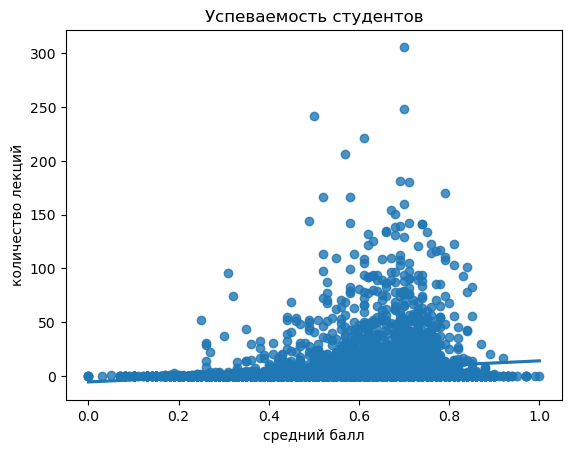

In [27]:
# Визуализация 
sns.regplot(data_st_agg, x= data_st_agg['answered_correctly','mean'], y=data_st_agg['content_type_id','sum'])
plt.title('Успеваемость студентов')
plt.xlabel('средний балл')
plt.ylabel('количество лекций')
plt.show()

In [28]:
# На лекции ходить надо!))